### Importing the Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

#### Problem Description

The goal of the problem statement is to determine the authorship of Frankenstein among Authors. The Problem statement was developed to Justify the Author with the help of Data Mining Techniques. They are:


1) RandomForestClassifier Model

2) Logistic Regression Model

3) Bagging Classifier


### Data Collection:

The data has been collected from Project gutenberg website. We have collected the data of the books from four authors mentioned in the problem statement and three contemporary authors who are in the same genre.Then chunked the large text from the authors book using tokenize from nltk library.

Features : The data I collected consists of two features namely Text, Author.

Author: This Features Holds the Name of the Author which is our class Variable

Text: Text feature holds the string of information which is a line from paragraph obtained from the books


### Importing the Dataset

In [15]:
data=pd.read_csv("author_dataset.csv")
data

,text,author
0,Tallyho!,Percy
1,"""She means vampire, not seaweed, but it doesn'...",Alcott
2,I quickly collected some branches; but they we...,Mary
3,"“She is at the lodge, aunt”.",Bronte
4,"30 PANTHEA: The past Hours weak and gray, Wit...",Percy
...,...,...
20995,"I'll wear it for fun, and show him I don't car...",Alcott
20996,"“But soon,” he cried, with sad and solemn enth...",Polidori
20997,With them he is remarkably agreeable”.,Austen
20998,I had once vowed that I would never call her a...,Bronte


In [16]:
data.value_counts()

text                                                                                                                                                                                                               author
Cain.                                                                                                                                                                                                              Baron     36
Lucifer.                                                                                                                                                                                                           Baron     24
Sieg.                                                                                                                                                                                                              Baron     21
Iden.                                                                                                         

In [17]:
data.isnull().sum()

text      0
author    0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='author', ylabel='count'>

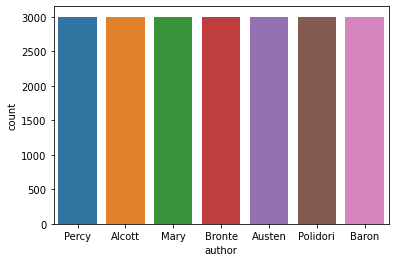

In [18]:
sns.countplot(data['author'])

#### Observations:

Based on the countplot, the dataset was balanced.

In [19]:
x=data['text']
y=data['author']

### Text Preprocessing

In [20]:
a = []
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
for sen in range(0, len(x)):
    b = re.sub(r'\W', ' ', str(x[sen]))
    b = re.sub(r'\s+[a-zA-Z]\s+', ' ', b)
    b = re.sub(r'\^[a-zA-Z]\s+', ' ', b) 
    b = re.sub(r'\s+', ' ', b, flags=re.I)
    b = re.sub(r'^b\s+', '', b)
    b = b.lower()
    b = b.split()
    b = [stemmer.lemmatize(word) for word in b]
    b = ' '.join(b)
    a.append(b)

In [8]:
a

['tallyho',
 'she mean vampire not seaweed but it doesn matter',
 'i quickly collected some branch but they were wet and would not burn',
 'she is at the lodge aunt',
 '30 panthea the past hour weak and gray with the spoil which their toil raked together from the conquest but one could foil',
 'her answer wa warmly in his favour',
 'a rembrandt and teniers etc',
 'elizabeth could not but look surprised',
 'such were the event that preyed on the heart of felix and rendered him when first saw him the most miserable of his family',
 'her lover lived nor foe nor fear could blight that full blown moment in it all delight joy trickled in her tear joy filled the sob that rocked her heart till almost heard to throb and paradise wa breathing in the sigh of nature child in nature ecstasy',
 '60 compare run run orlando carve on every tree the fair the chaste and unexpressive she',
 'a few word from u decided him and hope and joy sparkled in his eye the idea of embarking in career so congenial to 

### Converting Text to Numbers

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(a).toarray()

In [10]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
x = tfidfconverter.fit_transform(x).toarray()

In [12]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
x = tfidfconverter.fit_transform(a).toarray()

In [14]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Training and Testing the Data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [16]:
x_train.shape,y_train.shape

((14700, 5000), (14700,))

### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
classifier = RandomForestClassifier(n_estimators=100, random_state=45)
classifier.fit(x_train, y_train) 

RandomForestClassifier(random_state=45)

In [19]:
y_pred = classifier.predict(x_test)

### Evaluation of RandomForestClassifier

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[588  71  69  86  34  22  24]
 [100 531  58  97  49  13  36]
 [ 45  50 410  63 101 147 118]
 [107 107  99 393  70  51  50]
 [ 47  42 131  58 296 144 214]
 [ 33  34 158  44 121 366  92]
 [ 42  61 148  51 228 136 265]]
              precision    recall  f1-score   support

      Alcott       0.61      0.66      0.63       894
      Austen       0.59      0.60      0.60       884
       Baron       0.38      0.44      0.41       934
      Bronte       0.50      0.45      0.47       877
        Mary       0.33      0.32      0.32       932
       Percy       0.42      0.43      0.42       848
    Polidori       0.33      0.28      0.31       931

    accuracy                           0.45      6300
   macro avg       0.45      0.45      0.45      6300
weighted avg       0.45      0.45      0.45      6300

0.45222222222222225


### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred=lreg.predict(x_test)

### Evaluation of Logistic Regression

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[643  49  61  85  17  16  23]
 [ 72 574  59  89  22  13  55]
 [ 29  39 416  75 103 135 137]
 [ 78  85  74 480  51  53  56]
 [ 15  39 113  64 336 115 250]
 [ 18  24 118  51  99 414 124]
 [ 26  65 131  44 224  86 355]]
              precision    recall  f1-score   support

      Alcott       0.73      0.72      0.72       894
      Austen       0.66      0.65      0.65       884
       Baron       0.43      0.45      0.44       934
      Bronte       0.54      0.55      0.54       877
        Mary       0.39      0.36      0.38       932
       Percy       0.50      0.49      0.49       848
    Polidori       0.35      0.38      0.37       931

    accuracy                           0.51      6300
   macro avg       0.51      0.51      0.51      6300
weighted avg       0.51      0.51      0.51      6300

0.5107936507936508


### BaggingClassifier

In [24]:
from sklearn.ensemble import BaggingClassifier 

In [25]:
model=BaggingClassifier()
model.fit(x_train,y_train)

BaggingClassifier()

In [26]:
y_pred=model.predict(x_test)
y_pred

array(['Alcott', 'Mary', 'Baron', ..., 'Polidori', 'Percy', 'Polidori'],
      dtype=object)

### Evaluation of BaggingClassifier

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[523  78  71 114  43  25  40]
 [ 87 483  59 118  67  16  54]
 [ 45  61 371  74 112 144 127]
 [ 97 101  88 384  86  58  63]
 [ 44  55 130  60 270 153 220]
 [ 38  42 161  50 123 328 106]
 [ 35  49 155  64 230 129 269]]
              precision    recall  f1-score   support

      Alcott       0.60      0.59      0.59       894
      Austen       0.56      0.55      0.55       884
       Baron       0.36      0.40      0.38       934
      Bronte       0.44      0.44      0.44       877
        Mary       0.29      0.29      0.29       932
       Percy       0.38      0.39      0.39       848
    Polidori       0.31      0.29      0.30       931

    accuracy                           0.42      6300
   macro avg       0.42      0.42      0.42      6300
weighted avg       0.42      0.42      0.42      6300

0.41714285714285715


#### Results

Three data mining approaches, namely the Bagging Classifier, Logistic Regression Model, and RandomForestClassifier Model, were used to classify the writers on a particular paragraph, and I was also able to cluster the authors based on the text. 

The accuracy scores for each method are listed below.

                    Technique                       Accuracy
                    
             Bagging Classifier                       0.41
             Logistic Regression Model                0.51
             RandomForestClassifier Model             0.45


### References:

Converting text to Numbers:

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
    
For Stopwords, WordNet :

https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

https://www.nltk.org/howto/wordnet.html

Bagging Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Logistic Regression Model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

RandomForestClassifier 

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

isnull

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html

Pandas Dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
    
    